# ICE - 4701 Advanced Machine Learning
# **Assignment 2**

## Author: Ebube Glory Ogbonda 
## Student ID : 500654313
|   |   |
|---|---|
| **Module:**        | ICE-4701 |
| **Department:**    | School of Computer Science and Electronic Engineering |
| **Module credit:** |20 |
| **Organiser:**     |Dr Cameron Grey |
| **Date out:**      | 18 April 2023 |

**Due date: Friday, 05 May 2023 17:00**

 **Instructions.**
>
> • Solve all problems.
>
> • Possible marks: 100.
>
> • Submit ONE file with your Python code. The code should produce the
> desired output. If you need to include a comment, place it as a
> comment in the Python file. You can submit a Jupyter Notebooks or a
> plain py file.
> Submit also all images that your code needs in order to
>run. You don’t have to submit the csv files with the data
>
> • Note: Points will be taken off for code which is long, unreadable, or inefficient.

_______________________________________________________

**Importing relevant packages**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### **Problem 1. Multi-label classification**

(a) Prepare a function named binary_relevance_ldc which will implement the Binary Relevance
Method for multilabel classification. The classifier model for the binary classification should be the
Linear Discriminant Classifier (LDC). The input should be: training data (N × n), training labels
(N × c, containing integers 1, 2, 3, ...), and testing data (Ntest × n). The function should return a
binary matrix of assigned labels of size Ntest × c

In [2]:
# Functions
def binary_relevance_ldc(training_data, training_labels, testing_data):
    binarized_training_labels = labels_to_binary_matrix(training_labels)
    predicted_label_matrix = np.zeros((testing_data.shape[0], binarized_training_labels.shape[1]))

    for label_idx in range(binarized_training_labels.shape[1]):
        ldc_classifier = LinearDiscriminantAnalysis()
        ldc_classifier.fit(training_data, binarized_training_labels[:, label_idx])
        label_predictions = ldc_classifier.predict(testing_data)
        predicted_label_matrix[:, label_idx] = label_predictions

    return predicted_label_matrix

def labels_to_binary_matrix(labels):
    unique_labels = np.unique(labels)
    binary_matrix = np.zeros((len(labels), len(unique_labels)))

    for row_idx, label in enumerate(labels):
        label_index = np.where(unique_labels == label)[0][0]
        binary_matrix[row_idx, label_index] = 1

    return binary_matrix

(b) Subsequently, write a function named adaptive_knn which will implement the Adaptive knn
methods for multilabel classification as explained in the lectures (The slide is reprodiced in Figure 1).
<BR>
Assume that we apply the following rule: after calculating the membership counting vector C(x),
our classifier returns only the casses which score value larger than 3 in the counting vector. Use
k = 10 neighbours. The input and the output should be the same as for the binary relevance
function in part (a) of this assignment.
<br>

![image.png](attachment:image.png)

In [3]:
def euclidean_distance_matrix(X, Y):
    return np.sqrt(np.sum((X[:, np.newaxis] - Y)**2, axis=2))

def adaptive_knn(training_data, training_labels, testing_data):
    binarized_training_labels = labels_to_binary_matrix(training_labels)
    dist_matrix = euclidean_distance_matrix(training_data, testing_data)
    predicted_label_matrix = np.zeros((testing_data.shape[0], binarized_training_labels.shape[1]))
    k_neighbors = 10
    threshold = 3

    for i in range(testing_data.shape[0]):
        nearest_neighbors_indices = np.argpartition(dist_matrix[:, i], k_neighbors)[:k_neighbors]
        membership_counting_vector = np.sum(binarized_training_labels[nearest_neighbors_indices], axis=0)
        predicted_label_matrix[i, membership_counting_vector > threshold] = 1

    return predicted_label_matrix

(c) Use the Bird data set from Lab 6. (The csv files are also provided with this script for convenience.)
Apply the two functions you programmed in (a) and (b) to compare the two classifiers for multilabel
data on this dataset. Program and use the hamming loss for your comparison

In [4]:
def compute_hamming_loss(y_true, y_pred):
    assert y_true.shape == y_pred.shape, "y_true and y_pred must have the same shape"
    return np.sum(np.abs(y_true - y_pred)) / (y_true.shape[0] * y_true.shape[1])

def bird_recognition_accuracy(true_labels, predicted_labels):
    num_birds = true_labels.shape[1]
    bird_accuracy = np.zeros(num_birds)

    for i in range(num_birds):
        bird_true_labels = true_labels[:, i]
        bird_predicted_labels = predicted_labels[:, i]
        bird_accuracy[i] = np.mean(bird_true_labels == bird_predicted_labels)

    return bird_accuracy

def load_data(train_data_url, test_data_url):
    train_data = pd.read_csv(train_data_url)
    test_data = pd.read_csv(test_data_url)
    
    return train_data, test_data

def separate_features_labels(train_data, test_data):
    train_features = train_data.iloc[:, :-19].values
    train_labels = train_data.iloc[:, -19:].values
    test_features = test_data.iloc[:, :-19].values
    test_labels = test_data.iloc[:, -19:].values
    
    return train_features, train_labels, test_features, test_labels

def convert_labels_to_integers(train_labels, test_labels):
    train_labels_integers = np.array([np.argmax(row) + 1 for row in train_labels])
    test_labels_integers = np.array([np.argmax(row) + 1 for row in test_labels])
    
    return train_labels_integers, test_labels_integers

def evaluate_classifiers_and_find_birds(train_features, train_labels, train_labels_integers, test_features, test_labels, test_labels_integers):
    # Perform the Binary Relevance LDC
    predicted_labels_ldc = binary_relevance_ldc(train_features, train_labels_integers, test_features)

    # Perform the Adaptive KNN
    predicted_labels_adaptive_knn = adaptive_knn(train_features, train_labels_integers, test_features)

    # Calculate Hamming losses
    hamming_loss_ldc = compute_hamming_loss(test_labels, predicted_labels_ldc)
    hamming_loss_adaptive_knn = compute_hamming_loss(test_labels, predicted_labels_adaptive_knn)

    print(f"Hamming_loss_ldc: {hamming_loss_ldc:.10f}")
    print(f"Hamming_loss_adaptive_knn: {hamming_loss_adaptive_knn:.10f}")

    # Compare the two classifiers based on their Hamming losses
    if hamming_loss_ldc < hamming_loss_adaptive_knn:
        print("Binary Relevance LDC performs better than Adaptive KNN.")
    elif hamming_loss_ldc > hamming_loss_adaptive_knn:
        print("Adaptive KNN performs better than Binary Relevance LDC.")
    else:
        print("Both classifiers perform equally.")
    
    # Compute bird recognition accuracy for both classifiers
    bird_accuracy_ldc = bird_recognition_accuracy(test_labels, predicted_labels_ldc)
    bird_accuracy_adaptive_knn = bird_recognition_accuracy(test_labels, predicted_labels_adaptive_knn)
    

    return (hamming_loss_ldc, hamming_loss_adaptive_knn, bird_accuracy_ldc, bird_accuracy_adaptive_knn)

#Implementation
train_data_url = "csv_result-birds-train.csv"
test_data_url = "csv_result-birds-test.csv"

train_data, test_data = load_data(train_data_url, test_data_url)
train_features, train_labels, test_features, test_labels = separate_features_labels(train_data, test_data)
train_labels_integers, test_labels_integers = convert_labels_to_integers(train_labels, test_labels)
(hamming_loss_ldc, hamming_loss_adaptive_knn, bird_accuracy_ldc, bird_accuracy_adaptive_knn) = evaluate_classifiers_and_find_birds(train_features, train_labels, train_labels_integers, test_features, test_labels, test_labels_integers)

Hamming_loss_ldc: 0.2080821248
Hamming_loss_adaptive_knn: 0.0860355222
Adaptive KNN performs better than Binary Relevance LDC.


(d) Find out the bird that is most well recognised and the one that is least well recognised. Find
images of these birds and show them in a figure. You may use plt.imread() and plt.imshow(). An example of the expected output is shown in Figure 2

In [5]:
def print_bird_accuracies_and_indices(bird_accuracy_ldc, bird_accuracy_adaptive_knn):
    print("Bird accuracies for Binary Relevance LDC:")
    for i, accuracy in enumerate(bird_accuracy_ldc):
        print(f"Bird index: {i}, Accuracy: {accuracy:.4f}")

    print("\nBird accuracies for Adaptive KNN:")
    for i, accuracy in enumerate(bird_accuracy_adaptive_knn):
        print(f"Bird index: {i}, Accuracy: {accuracy:.4f}")

    most_well_recognized_bird_ldc = np.argmax(bird_accuracy_ldc)
    least_well_recognized_bird_ldc = np.argmin(bird_accuracy_ldc)

    most_well_recognized_bird_adaptive_knn = np.argmax(bird_accuracy_adaptive_knn)
    least_well_recognized_bird_adaptive_knn = np.argmin(bird_accuracy_adaptive_knn)

    print("\nMost and least well-recognized birds:")
    print(f"\nMost well-recognized bird for LDC: Bird {most_well_recognized_bird_ldc}")
    print(f"Least well-recognized bird for LDC: Bird {least_well_recognized_bird_ldc}")
    print(f"\nMost well-recognized bird for Adaptive KNN: Bird {most_well_recognized_bird_adaptive_knn}")
    print(f"Least well-recognized bird for Adaptive KNN: Bird {least_well_recognized_bird_adaptive_knn}")
print_bird_accuracies_and_indices(bird_accuracy_ldc, bird_accuracy_adaptive_knn)


Bird accuracies for Binary Relevance LDC:
Bird index: 0, Accuracy: 0.3870
Bird index: 1, Accuracy: 0.7307
Bird index: 2, Accuracy: 0.8328
Bird index: 3, Accuracy: 0.8576
Bird index: 4, Accuracy: 0.7988
Bird index: 5, Accuracy: 0.8978
Bird index: 6, Accuracy: 0.7647
Bird index: 7, Accuracy: 0.7647
Bird index: 8, Accuracy: 0.7864
Bird index: 9, Accuracy: 0.7833
Bird index: 10, Accuracy: 0.7276
Bird index: 11, Accuracy: 0.8421
Bird index: 12, Accuracy: 0.7833
Bird index: 13, Accuracy: 0.8978
Bird index: 14, Accuracy: 0.7276
Bird index: 15, Accuracy: 0.8762
Bird index: 16, Accuracy: 0.8916
Bird index: 17, Accuracy: 0.8638
Bird index: 18, Accuracy: 0.8328

Bird accuracies for Adaptive KNN:
Bird index: 0, Accuracy: 0.3746
Bird index: 1, Accuracy: 0.8483
Bird index: 2, Accuracy: 0.9226
Bird index: 3, Accuracy: 0.9845
Bird index: 4, Accuracy: 0.9783
Bird index: 5, Accuracy: 0.9814
Bird index: 6, Accuracy: 0.9133
Bird index: 7, Accuracy: 0.9443
Bird index: 8, Accuracy: 0.9009
Bird index: 9, Acc

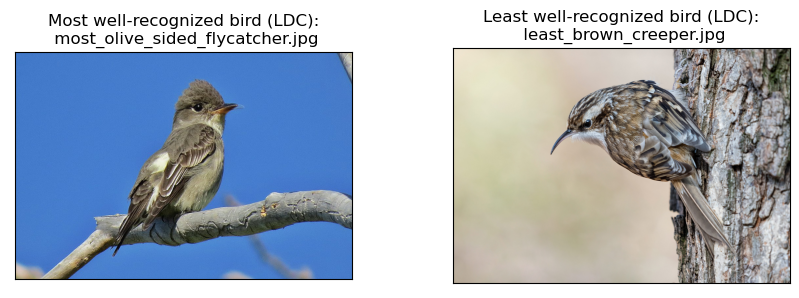

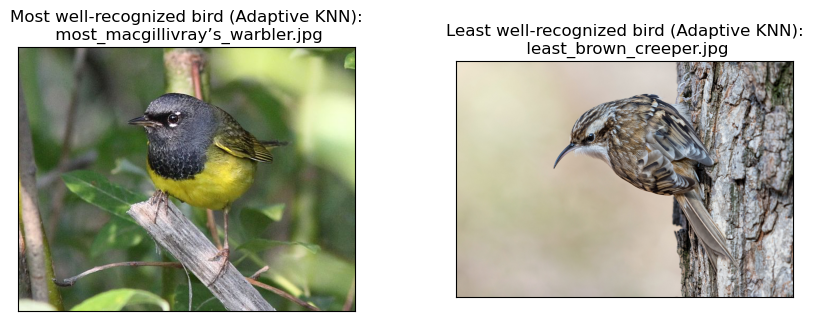

In [6]:
def display_bird_images(ldc_most, ldc_least, adaptive_knn_most, adaptive_knn_least):
    # Load the images of the most and least well-recognized birds for both methods
    most_recognized_bird_ldc = plt.imread(ldc_most)
    least_recognized_bird_ldc = plt.imread(ldc_least)

    most_recognized_bird_adaptive_knn = plt.imread(adaptive_knn_most)
    least_recognized_bird_adaptive_knn = plt.imread(adaptive_knn_least)

    # Create a single plot with two subplots for Binary Relevance LDC
    fig_ldc, axs_ldc = plt.subplots(1, 2, figsize=(10, 5))

    # Display the images of the most and least well-recognized birds for LDC
    axs_ldc[0].imshow(most_recognized_bird_ldc, aspect='equal')
    axs_ldc[0].set_title(f'Most well-recognized bird (LDC):\n {ldc_most}')
    axs_ldc[0].set_xticks([])
    axs_ldc[0].set_yticks([])

    axs_ldc[1].imshow(least_recognized_bird_ldc, aspect='equal')
    axs_ldc[1].set_title(f'Least well-recognized bird (LDC):\n {ldc_least}')
    axs_ldc[1].set_xticks([])
    axs_ldc[1].set_yticks([])

    plt.subplots_adjust(wspace=0.3)
    plt.show()

    # Create a single plot with two subplots for Adaptive KNN
    fig_adaptive_knn, axs_adaptive_knn = plt.subplots(1, 2, figsize=(10, 5))

    # Display the images of the most and least well-recognized birds for Adaptive KNN
    axs_adaptive_knn[0].imshow(most_recognized_bird_adaptive_knn, aspect='equal')
    axs_adaptive_knn[0].set_title(f'Most well-recognized bird (Adaptive KNN):\n {adaptive_knn_most}')
    axs_adaptive_knn[0].set_xticks([])
    axs_adaptive_knn[0].set_yticks([])

    axs_adaptive_knn[1].imshow(least_recognized_bird_adaptive_knn, aspect='equal')
    axs_adaptive_knn[1].set_title(f'Least well-recognized bird (Adaptive KNN):\n {adaptive_knn_least}')
    axs_adaptive_knn[1].set_xticks([])
    axs_adaptive_knn[1].set_yticks([])

    plt.subplots_adjust(wspace=0.3)
    plt.show()

    
display_bird_images(
    'most_olive_sided_flycatcher.jpg',
    'least_brown_creeper.jpg',
    'most_macgillivray’s_warbler.jpg',
    'least_brown_creeper.jpg'
)

### **Problem 2.  Streaming data**
Consider the following experiment. A data stream comes from two classes with normal distributions.
The distributions are static; their parameters don't change with time. The parameters are:
$$
m_1 = \begin{bmatrix} 0 , 1 \end{bmatrix}, \Sigma_1 = \begin{bmatrix} 7 & -1 \\ -1 & 3 \end{bmatrix}, m_2 = \begin{bmatrix} 4 , 2 \end{bmatrix}, \Sigma_2 = \begin{bmatrix} 2 & 1 \\ 1 & 6 \end{bmatrix}
$$
(a) Generate a large data set from the two-class distribution to serve as the testing data. Use prior
probabilities 0.5 and 0.5. Plot the data.

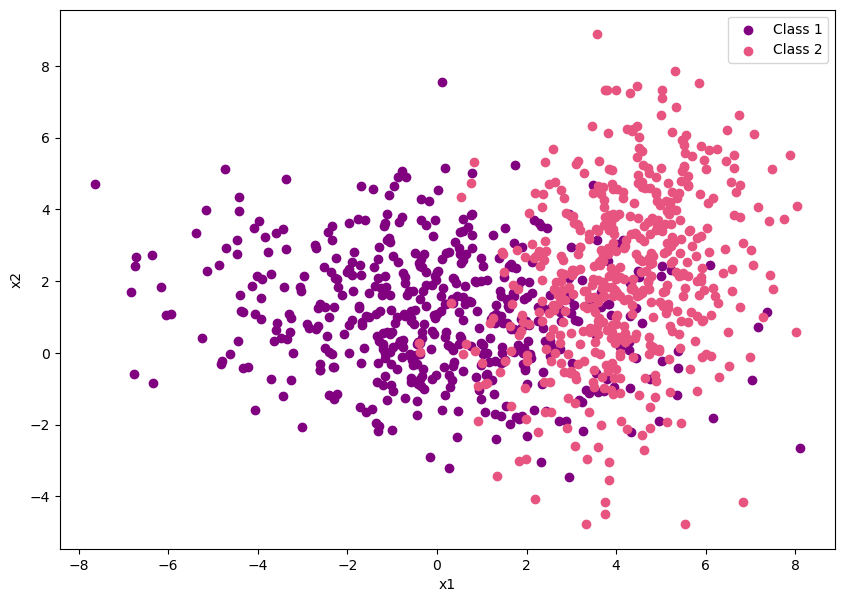

In [7]:
def generate_data(n_samples, priors, means, covariances):
    class_samples = [int(p * n_samples) for p in priors]
    
    data = []
    for i, samples in enumerate(class_samples):
        data_class = np.random.multivariate_normal(means[i], covariances[i], samples)
        data.append(data_class)
    
    return data

def plot_data(data):
    fig, ax = plt.subplots(figsize=(10, 7))
    
    colors = ['purple', '#E75480']
    
    for i, data_class in enumerate(data):
        ax.scatter(data_class[:, 0], data_class[:, 1], color=colors[i], label=f'Class {i + 1}')
    
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.legend()
    plt.show()

# Set the random seed
np.random.seed(42)

# Parameters
n_samples = 1000
priors = [0.5, 0.5]
means = [np.array([0, 1]), np.array([4, 2])]
covariances = [np.array([[7, -1], [-1, 3]]), np.array([[2, 1], [1, 6]])]

# Generate and plot the data
data = generate_data(n_samples, priors, means, covariances)
plot_data(data)


(b) Prepare and run a data stream of 300 data points coming from the distribution of the problem.
Sample each point by first choosing which class label the point should come from. To do this,
compare a random number generated from a uniform distribution within [0,1] with threshold 0.5.
If larger, sample a point from Class 1, otherwise, sample a point from Class 2. Apply the adaptive
nearest mean classifier from Lab 7 (supervised version) to the streaming data. Start with means
$$
m_1 = \begin{bmatrix} 1 , 2 \end{bmatrix} \text{ and } m_2 = \begin{bmatrix} -1 , -1 \end{bmatrix}
$$
Store the accuracy of the classifier along the data stream as well
as the class means. Prepare two plots: (1) The accuracy of the classifier along the time steps, (2)
The migration of the two means. An example of a figure of migration of two means for streaming
data classification was shown in Lecture 11, slide 27. You don't need to plot the streaming points,
just the mean trajectory.


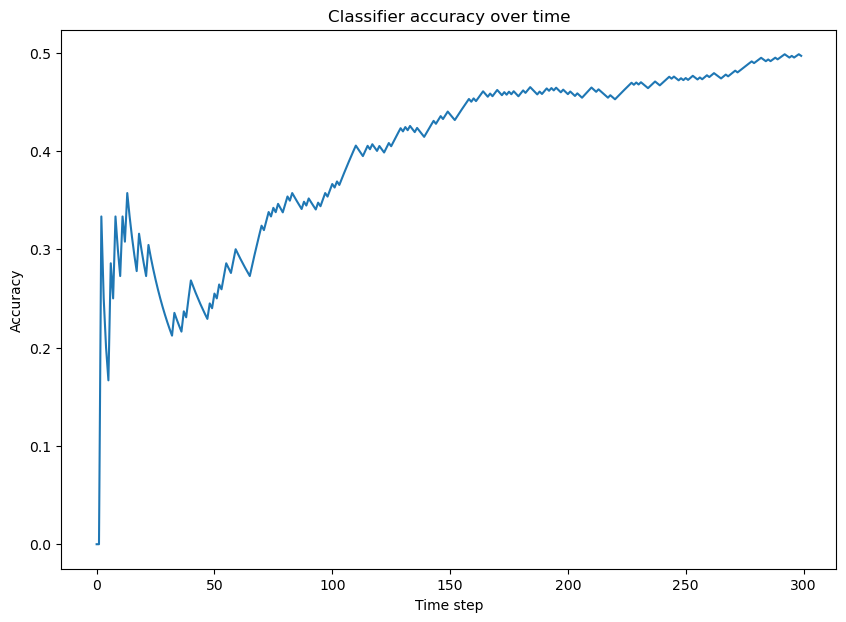

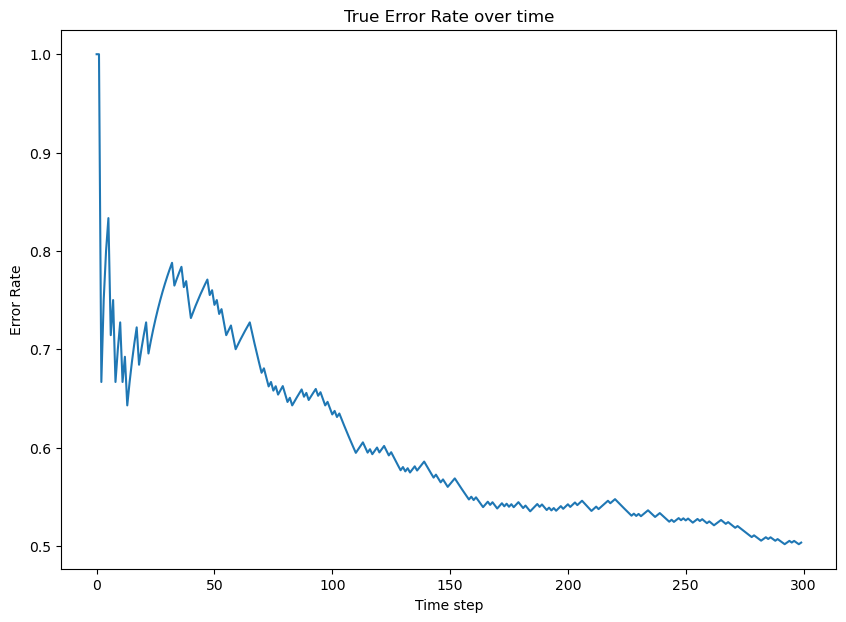

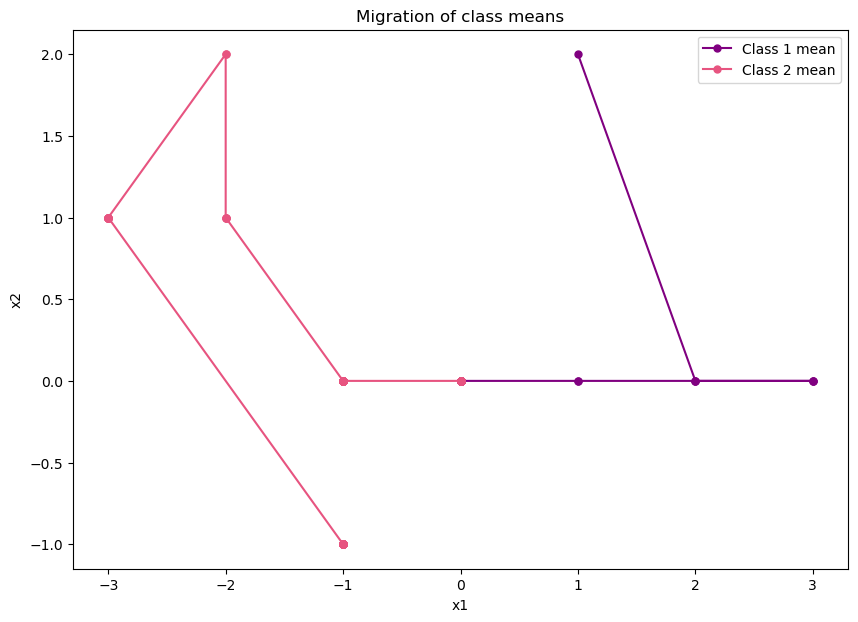

In [8]:
def generate_data_stream(data, priors, n_points=300):
    np.random.seed(42)

    stream_data = []
    stream_labels = []
    for _ in range(n_points):
        random_num = np.random.rand()
        if random_num > 0.5:
            class_idx = 0
        else:
            class_idx = 1

        # Select a random sample from the corresponding class
        sample_idx = np.random.randint(len(data[class_idx]))
        sample = data[class_idx][sample_idx]

        # Remove the selected sample from the data
        data[class_idx] = np.delete(data[class_idx], sample_idx, axis=0)

        stream_data.append(sample)
        stream_labels.append(class_idx)

    return np.array(stream_data), np.array(stream_labels)

def adaptive_nearest_mean_classifier(data_stream, labels, initial_means):
    means = np.copy(initial_means)
    class_count = np.zeros(len(initial_means))
    accuracies = []
    mean_trajectory = [np.copy(means)]

    for i, data_point in enumerate(data_stream):
        distances = [np.linalg.norm(data_point - mean) for mean in means]
        predicted_class = np.argmin(distances)
        
        is_correct = (predicted_class == labels[i])
        accuracies.append(is_correct)
        
        class_count[predicted_class] += 1
        learning_rate = 1 / class_count[predicted_class]
        means[predicted_class] = means[predicted_class] + learning_rate * (data_point - means[predicted_class])
        
        mean_trajectory.append(np.copy(means))
    
    return accuracies, np.array(mean_trajectory)

def plot_accuracy(accuracies):
    plt.figure(figsize=(10, 7))
    plt.plot(np.cumsum(accuracies) / np.arange(1, len(accuracies) + 1))
    plt.xlabel("Time step")
    plt.ylabel("Accuracy")
    plt.title("Classifier accuracy over time")
    plt.show()
def plot_true_error_rate(accuracies):
    plt.figure(figsize=(10, 7))
    plt.plot(1 - (np.cumsum(accuracies) / np.arange(1, len(accuracies) + 1)))
    plt.xlabel("Time step")
    plt.ylabel("Error Rate")
    plt.title("True Error Rate over time")
    plt.show()
def plot_mean_trajectory(mean_trajectory):
    plt.figure(figsize=(10, 7))
    plt.plot(mean_trajectory[:, 0, 0], mean_trajectory[:, 0, 1], 'purple', marker='o', markersize=5, label='Class 1 mean')
    plt.plot(mean_trajectory[:, 1, 0], mean_trajectory[:, 1, 1], '#E75480', marker='o', markersize=5, label='Class 2 mean')
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("Migration of class means")
    plt.legend()
    plt.show()


# Generate data stream
data_stream, labels = generate_data_stream(data, priors)

# Initial means
initial_means = np.array([[1, 2], [-1, -1]])

# Apply adaptive nearest mean classifier
accuracies, mean_trajectory = adaptive_nearest_mean_classifier(data_stream, labels, initial_means)

# Plot the classifier accuracy and mean trajectory
plot_accuracy(accuracies)
plot_true_error_rate(accuracies)
plot_mean_trajectory(mean_trajectory)


(c) Include, in the streaming data experiment in part (b) of this question, a calculation of the
running error rate. This error rate is obtained ONLY using the streaming data. For example,
suppose that the first object is classified incorrectly. Then your running error at time 1 is 1 (100\%).
Suppose that the next object is classified correctly by the updated NMC. The running error at time
2 becomes $\frac{1}{2} = 0.5$. Now, let the third object be labelled correctly. The running error at time 3
is $\frac{1}{3} = 0.33$, and so on. Plot the running error rate together with the “true” error rate which you
plotted in part (b). Give a comment on the two curves you plotted.


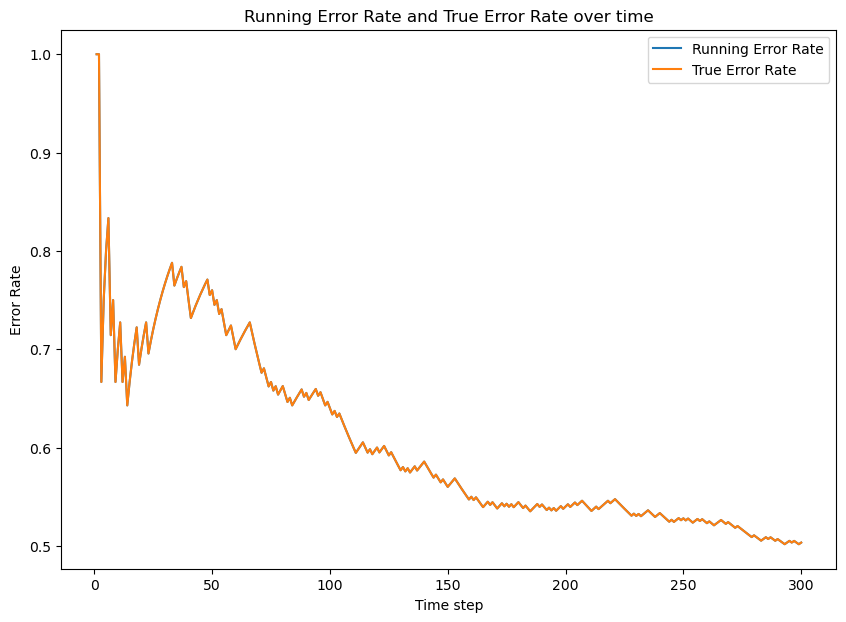

In [11]:
def plot_error_rates(accuracies):
    running_error_rate = 1 - (np.cumsum(accuracies) / np.arange(1, len(accuracies) + 1))
    true_error_rate = np.array([1 - (np.sum(accuracies[:i+1]) / (i+1)) for i in range(len(accuracies))])
    time_steps = np.arange(1, len(accuracies) + 1)
    
    plt.figure(figsize=(10, 7))
    plt.plot(time_steps, running_error_rate, label="Running Error Rate")
    plt.plot(time_steps, true_error_rate, label="True Error Rate")
    plt.xlabel("Time step")
    plt.ylabel("Error Rate")
    plt.title("Running Error Rate and True Error Rate over time")
    plt.legend()
    plt.show()

# Plot error rates
plot_error_rates(accuracies)


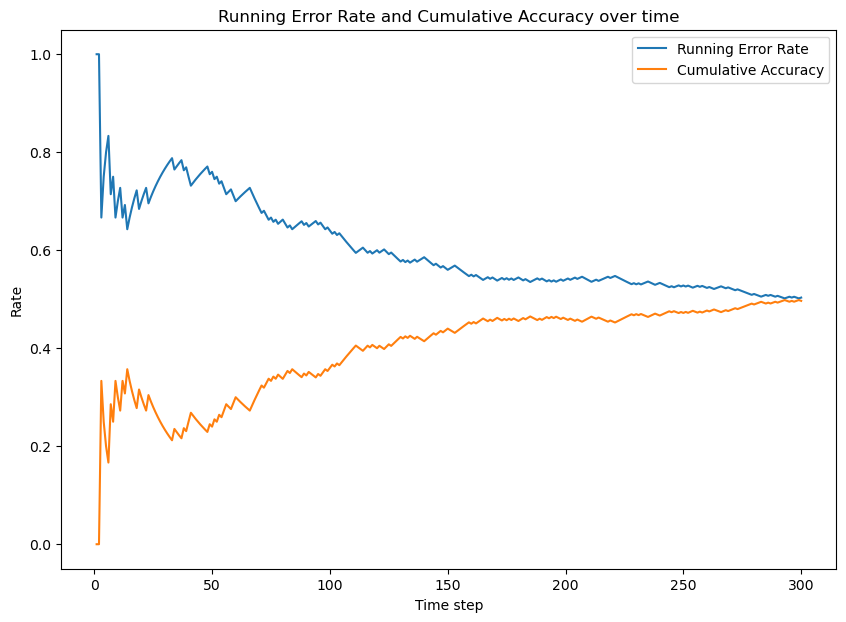

In [13]:
def plot_error_rate_and_cumulative_accuracy(accuracies):
    running_error_rate = 1 - (np.cumsum(accuracies) / np.arange(1, len(accuracies) + 1))
    cumulative_accuracy = np.cumsum(accuracies) / np.arange(1, len(accuracies) + 1)
    time_steps = np.arange(1, len(accuracies) + 1)
    
    plt.figure(figsize=(10, 7))
    plt.plot(time_steps, running_error_rate, label="Running Error Rate")
    plt.plot(time_steps, cumulative_accuracy, label="Cumulative Accuracy")
    plt.xlabel("Time step")
    plt.ylabel("Rate")
    plt.title("Running Error Rate and Cumulative Accuracy over time")
    plt.legend()
    plt.show()

# Plot running error rate and cumulative accuracy
plot_error_rate_and_cumulative_accuracy(accuracies)


## Conclusion
